In [1]:
# Packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Data Collection
credit_card_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [3]:
# Data Exploration
print("Credit card dataset:\n")
credit_card_data

Credit card dataset:



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
print("Shape:", credit_card_data.shape)
credit_card_data.info()

Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

In [5]:
print("Descriptive statistics for credit card dataset:")
print(credit_card_data.describe())

Descriptive statistics for credit card dataset:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-

In [6]:
print("Missing values in credit card dataset:\n")
credit_card_data.isnull().sum()

Missing values in credit card dataset:



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
print("Legit Transactions (0) and Fraud Transactions (1):")
credit_card_data['Class'].value_counts()

Legit Transactions (0) and Fraud Transactions (1):


0    284315
1       492
Name: Class, dtype: int64

In [8]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
print("Descriptive statistics for legit:\n")
legit.Amount.describe()

Descriptive statistics for legit:



count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
print("Descriptive statistics for fraud:\n")
fraud.Amount.describe()

Descriptive statistics for fraud:



count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
# Data Preprocessing
legit_sample = legit.sample(n=492)
transaction_dataset = pd.concat([legit_sample, fraud], axis=0)
transaction_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152306,97247.0,2.035307,-1.162585,-0.763217,-0.988842,-0.503113,0.566234,-1.233907,0.056034,1.114067,...,0.293703,0.935355,-0.006522,-0.214138,-0.144248,-0.108374,-0.028431,-0.048962,89.10,0
146738,87857.0,-1.075442,1.121501,2.544985,2.190815,0.777094,0.691417,0.496076,0.433178,-1.633143,...,-0.159945,-0.764523,-0.206349,-0.456789,0.297293,-0.339090,-0.001239,0.059725,15.21,0
38491,39412.0,-2.031837,-2.173792,1.864805,-4.280820,0.124637,1.400205,-0.141456,0.541039,1.277243,...,-0.425081,-0.111206,0.584389,-1.411422,0.469409,-0.953313,0.005583,-0.227006,145.42,0
118354,75046.0,1.064059,-1.714769,0.592919,-1.235871,-2.022998,-0.662334,-0.965496,-0.051366,-1.921256,...,-0.193143,-0.725771,0.027582,0.466531,-0.024174,-0.458330,-0.002597,0.054302,210.00,0
69352,53382.0,-1.203271,-0.086691,1.671040,1.087548,1.278776,-0.379800,0.595003,-0.058965,-1.051847,...,0.174094,0.299468,-0.049423,0.022098,0.450132,-0.195553,-0.138527,-0.139187,75.73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [30]:
print("Balanced transactions dataset:")
transaction_dataset['Class'].value_counts()

Balanced transactions dataset:


0    492
1    492
Name: Class, dtype: int64

In [15]:
transaction_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94079.050813,0.076390,0.059836,-0.045288,-0.087257,-0.018899,0.026677,-0.059970,0.041106,-0.024709,...,0.016373,0.044010,-0.008969,-0.012560,-0.001457,-0.005812,0.008025,0.005183,0.004084,82.224512
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
X = transaction_dataset.drop(columns='Class', axis=1)
Y = transaction_dataset['Class']

In [17]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
152306   97247.0  2.035307 -1.162585 -0.763217 -0.988842 -0.503113  0.566234   
146738   87857.0 -1.075442  1.121501  2.544985  2.190815  0.777094  0.691417   
38491    39412.0 -2.031837 -2.173792  1.864805 -4.280820  0.124637  1.400205   
118354   75046.0  1.064059 -1.714769  0.592919 -1.235871 -2.022998 -0.662334   
69352    53382.0 -1.203271 -0.086691  1.671040  1.087548  1.278776 -0.379800   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [18]:
print(Y)

152306    0
146738    0
38491     0
118354    0
69352     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [19]:
# Model Selection, Training, Evaluation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [21]:
# Logistic Regression Model
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

print("Logistic Regression Model")

X_train_prediction1 = model1.predict(X_train)
training_data_accuracy1 = accuracy_score(X_train_prediction1, Y_train)
print('\nAccuracy on Training data: ', training_data_accuracy1)

X_test_prediction1 = model1.predict(X_test)
test_data_accuracy1 = accuracy_score(X_test_prediction1, Y_test)
print('\nAccuracy score on Test Data: ', test_data_accuracy1)

print("\nClassification Report (Random Forest - Training):")
print(classification_report(Y_train, X_train_prediction1))
print("\nConfusion Matrix (Random Forest - Training):")
print(confusion_matrix(Y_train, X_train_prediction1))

print("\nClassification Report (Random Forest - Test):")
print(classification_report(Y_test, X_test_prediction1))
print("\nConfusion Matrix (Random Forest - Test):")
print(confusion_matrix(Y_test, X_test_prediction1))

Logistic Regression Model

Accuracy on Training data:  0.9529860228716646

Accuracy score on Test Data:  0.9086294416243654

Classification Report (Random Forest - Training):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       393
           1       0.97      0.93      0.95       394

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787


Confusion Matrix (Random Forest - Training):
[[383  10]
 [ 27 367]]

Classification Report (Random Forest - Test):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        99
           1       0.91      0.91      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197


Confusion Matrix (Random Forest - Test):
[[90  9]
 [ 9

In [22]:
# Random Forest Model
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)

print("Random Forest Model")

X_train_prediction2 = model2.predict(X_train)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)
print('\nAccuracy on Training data (Random Forest): ', training_data_accuracy2)

X_test_prediction2 = model2.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)
print('\nAccuracy score on Test Data (Random Forest): ', test_data_accuracy2)

print("\nClassification Report (Random Forest - Training):")
print(classification_report(Y_train, X_train_prediction2))
print("\nConfusion Matrix (Random Forest - Training):")
print(confusion_matrix(Y_train, X_train_prediction2))

print("\nClassification Report (Random Forest - Test):")
print(classification_report(Y_test, X_test_prediction2))
print("\nConfusion Matrix (Random Forest - Test):")
print(confusion_matrix(Y_test, X_test_prediction2))

Random Forest Model

Accuracy on Training data (Random Forest):  1.0

Accuracy score on Test Data (Random Forest):  0.9137055837563451

Classification Report (Random Forest - Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787


Confusion Matrix (Random Forest - Training):
[[393   0]
 [  0 394]]

Classification Report (Random Forest - Test):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197


Confusion Matrix (Random Forest - Test):
[[

In [23]:
# Support Vector Machine Model
model3 = SVC()
model3.fit(X_train, Y_train)

print("Support Vector Machine Model")

X_train_prediction3 = model3.predict(X_train)
training_data_accuracy3 = accuracy_score(X_train_prediction3, Y_train)
print('\nAccuracy on Training data (SVM): ', training_data_accuracy3)

X_test_prediction3 = model3.predict(X_test)
test_data_accuracy3 = accuracy_score(X_test_prediction3, Y_test)
print('\nAccuracy score on Test Data (SVM): ', test_data_accuracy3)

print("\nClassification Report (SVM - Training):")
print(classification_report(Y_train, X_train_prediction3))
print("\nConfusion Matrix (SVM - Training):")
print(confusion_matrix(Y_train, X_train_prediction3))

print("\nClassification Report (SVM - Test):")
print(classification_report(Y_test, X_test_prediction3))
print("\nConfusion Matrix (SVM - Test):")
print(confusion_matrix(Y_test, X_test_prediction3))

Support Vector Machine Model

Accuracy on Training data (SVM):  0.567979669631512

Accuracy score on Test Data (SVM):  0.5583756345177665

Classification Report (SVM - Training):
              precision    recall  f1-score   support

           0       0.58      0.47      0.52       393
           1       0.56      0.67      0.61       394

    accuracy                           0.57       787
   macro avg       0.57      0.57      0.56       787
weighted avg       0.57      0.57      0.56       787


Confusion Matrix (SVM - Training):
[[184 209]
 [131 263]]

Classification Report (SVM - Test):
              precision    recall  f1-score   support

           0       0.58      0.45      0.51        99
           1       0.55      0.66      0.60        98

    accuracy                           0.56       197
   macro avg       0.56      0.56      0.55       197
weighted avg       0.56      0.56      0.55       197


Confusion Matrix (SVM - Test):
[[45 54]
 [33 65]]


In [24]:
# Principal Component Analysis Model
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Principal Component Analysis Model")

model4 = LogisticRegression()
model4.fit(X_train_pca, Y_train)

X_train_prediction4 = model4.predict(X_train_pca)
training_data_accuracy4 = accuracy_score(X_train_prediction4, Y_train)
print('\nAccuracy on Training data (PCA): ', training_data_accuracy4)

X_test_prediction4 = model4.predict(X_test_pca)
test_data_accuracy4 = accuracy_score(X_test_prediction4, Y_test)
print('\nAccuracy score on Test Data (PCA): ', test_data_accuracy4)

print("\nClassification Report (PCA - Training):")
print(classification_report(Y_train, X_train_prediction4))
print("\nConfusion Matrix (PCA - Training):")
print(confusion_matrix(Y_train, X_train_prediction4))

print("\nClassification Report (PCA - Test):")
print(classification_report(Y_test, X_test_prediction4))
print("\nConfusion Matrix (PCA - Test):")
print(confusion_matrix(Y_test, X_test_prediction4))

Principal Component Analysis Model

Accuracy on Training data (PCA):  0.5730622617534943

Accuracy score on Test Data (PCA):  0.5685279187817259

Classification Report (PCA - Training):
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       393
           1       0.57      0.57      0.57       394

    accuracy                           0.57       787
   macro avg       0.57      0.57      0.57       787
weighted avg       0.57      0.57      0.57       787


Confusion Matrix (PCA - Training):
[[228 165]
 [171 223]]

Classification Report (PCA - Test):
              precision    recall  f1-score   support

           0       0.57      0.61      0.59        99
           1       0.57      0.53      0.55        98

    accuracy                           0.57       197
   macro avg       0.57      0.57      0.57       197
weighted avg       0.57      0.57      0.57       197


Confusion Matrix (PCA - Test):
[[60 39]
 [46 52]]


In [25]:
# Multilayer Perceptron Model
model5 = MLPClassifier()
model5.fit(X_train, Y_train)

print("Multilayer Perceptron Model")

X_train_prediction5 = model5.predict(X_train)
training_data_accuracy5 = accuracy_score(X_train_prediction5, Y_train)
print('\nAccuracy on Training data (MLP): ', training_data_accuracy5)

X_test_prediction5 = model5.predict(X_test)
test_data_accuracy5 = accuracy_score(X_test_prediction5, Y_test)
print('\nAccuracy score on Test Data (MLP): ', test_data_accuracy5)

print("\nClassification Report (MLP - Training):")
print(classification_report(Y_train, X_train_prediction5))
print("\nConfusion Matrix (MLP - Training):")
print(confusion_matrix(Y_train, X_train_prediction5))

print("\nClassification Report (MLP - Test):")
print(classification_report(Y_test, X_test_prediction5))
print("\nConfusion Matrix (MLP - Test):")
print(confusion_matrix(Y_test, X_test_prediction5))

Multilayer Perceptron Model

Accuracy on Training data (MLP):  0.5031766200762389

Accuracy score on Test Data (MLP):  0.49746192893401014

Classification Report (MLP - Training):
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       393
           1       0.50      1.00      0.67       394

    accuracy                           0.50       787
   macro avg       0.75      0.50      0.34       787
weighted avg       0.75      0.50      0.34       787


Confusion Matrix (MLP - Training):
[[  2 391]
 [  0 394]]

Classification Report (MLP - Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.50      1.00      0.66        98

    accuracy                           0.50       197
   macro avg       0.25      0.50      0.33       197
weighted avg       0.25      0.50      0.33       197


Confusion Matrix (MLP - Test):
[[ 0 99]
 [ 0 98]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


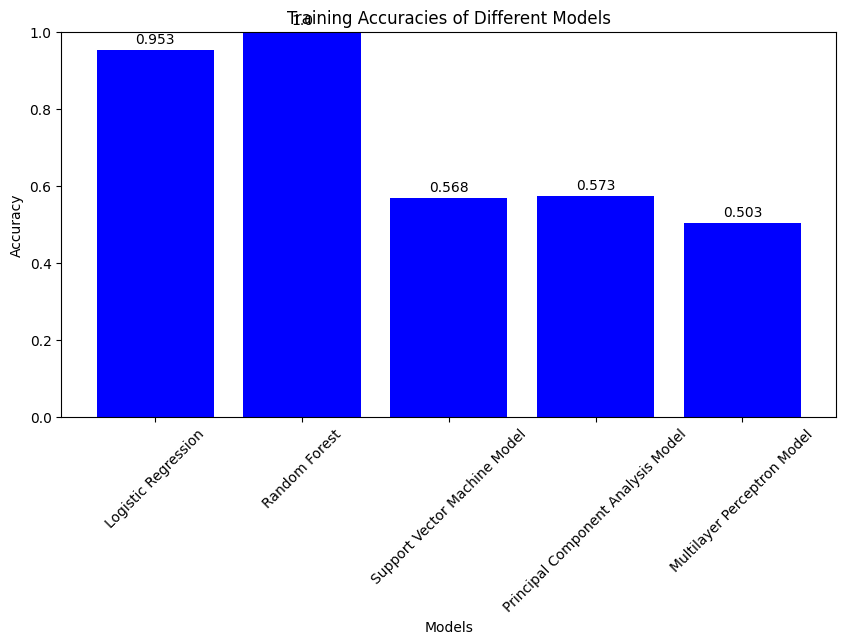

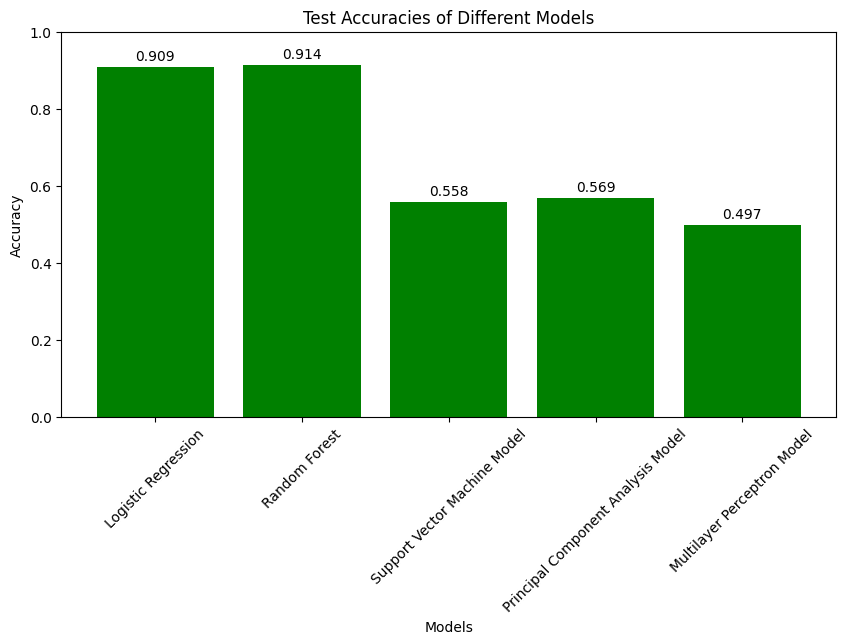

In [27]:
# Performance Visulization
model_names = ['Logistic Regression', 'Random Forest', 'Support Vector Machine Model', 'Principal Component Analysis Model', 'Multilayer Perceptron Model']
train_accuracies = [training_data_accuracy1, training_data_accuracy2, training_data_accuracy3, training_data_accuracy4, training_data_accuracy5]
test_accuracies = [test_data_accuracy1, test_data_accuracy2, test_data_accuracy3, test_data_accuracy4, test_data_accuracy5]

plt.figure(figsize=(10, 5))
plt.bar(model_names, train_accuracies, color='blue')
plt.title('Training Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, v in enumerate(train_accuracies):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(model_names, test_accuracies, color='green')
plt.title('Test Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, v in enumerate(test_accuracies):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()